# Prática 1 — Librerías

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Carga del *dataset*

In [27]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Métricas y percentiles de cada uno de los atributos
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
# Mostramos el conjunto de clases
df["target"] = breast_cancer.target
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
# Mostramos un subconjunto de muestras y características 
features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "target"]
df[features].tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,target
559,11.51,23.93,74.52,403.5,0.09261,1
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1
562,15.22,30.62,103.40,716.9,0.10480,0
563,20.92,25.09,143.00,1347.0,0.10990,0
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [36]:
# Porcentajes de malignos (== 0) y benignos (== 1)

benign_percentage = round(df[df["target"] == 1].shape[0] / df.shape[0] * 100, 2)
malignant_percentage = round(df[df["target"] == 0].shape[0] / df.shape[0] * 100, 2)

print("Existen un total de", df.shape[0], "muestras")
print("Benign percentage: ", benign_percentage, "%")
print("Malignant_percentage: ", malignant_percentage, "%")

Existen un total de 569 muestras
Benign percentage:  62.74 %
Malignant_percentage:  37.26 %


In [41]:
print("Existen", df.shape[1] - 1, "atributos predictivos\n")

# Mostramos todos los atributos tiene nuestro conjunto de datos
print(breast_cancer.feature_names, "\n")

Existen 30 atributos predictivos

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



## Gráficas con `matplotlib`
### Histogramas

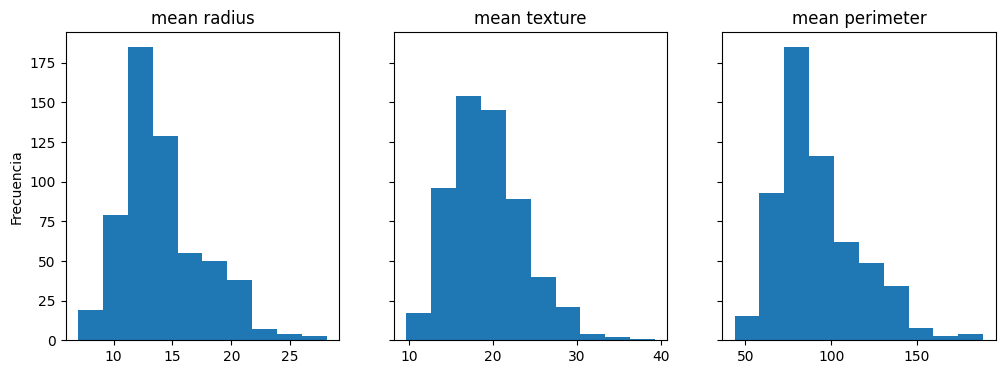

In [ ]:
# Histogramas de diferentes atributos como 'mean radius', 'mean texture' y 'mean perimeter'
attr = ["mean radius", "mean texture", "mean perimeter"]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
axs[0].set_ylabel("Frecuencia")

for i, a in enumerate(attr):
    axs[i].hist(df[a], bins = 10)
    axs[i].set_title(a)
plt.show()

### Gráfico de barras

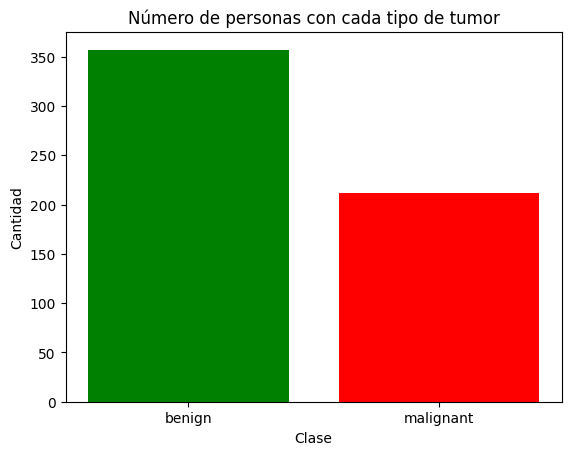

In [ ]:
# Gráfico de barras de las clases
counts = df['target'].value_counts()
labels = [breast_cancer.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Número de personas con cada tipo de tumor')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()

Con el gráfico de barras de las clases, podemos hacernos una idea del balance del dataset. En este caso, vemos que hay más tumores benignos que malignos, pero no presenta un desbalance muy notorio. Esto nos puede servir para saber que tipo de métricas son más adecuadas en cuanto a la calificación de los modelos entrenados en base a este conjunto de datos.

### Diagramas de dispersión

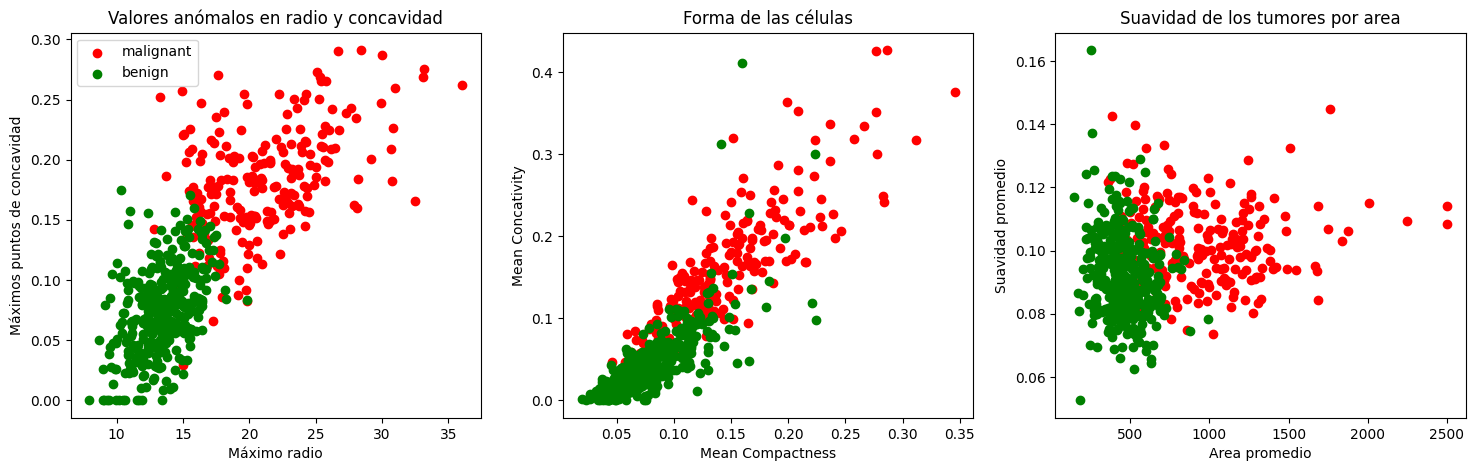

In [52]:
# Vamos a mostrar diferentes características del dataset en comparación unas con otras, para extraer conclusiones 
colors = ['red', 'green']

# Relación suavidad - textura

plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
for i in range(2):
    plt.scatter(df[df['target'] == i]['worst radius'],
                df[df['target'] == i]['worst concave points'],
                label=breast_cancer.target_names[i], color=colors[i])
plt.xlabel('Máximo radio')
plt.ylabel('Máximos puntos de concavidad')
plt.title('Valores anómalos en radio y concavidad')
plt.legend()


# Relación compactness - concativity 
plt.subplot(1, 3, 2)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean compactness'],
                df[df['target'] == i]['mean concavity'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concativity')
plt.title('Forma de las células')

# Relación area - suavidad
plt.subplot(1, 3, 3)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean area'],
                df[df['target'] == i]['mean smoothness'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Area promedio')
plt.ylabel('Suavidad promedio')
plt.title('Suavidad de los tumores por area')

plt.show()

De estas gráficas podemos extraer la siguiente información:
- Si los valores máximos de radio y concavidad detectados en un paciente, son altos, es muy probable que el tumor sea maligno
- Los tumores con mayor area, suelen ser malignos, mientras que la suavidad no influye tanto en la decisión
- Los tumores con una compacidad y concavidad media más alta, suelen ser malignos

Otra forma de analizar características de los datos es con el gráfico de líneas, con la que podemos comparar varias características a la vez.

### Gráfico de líneas

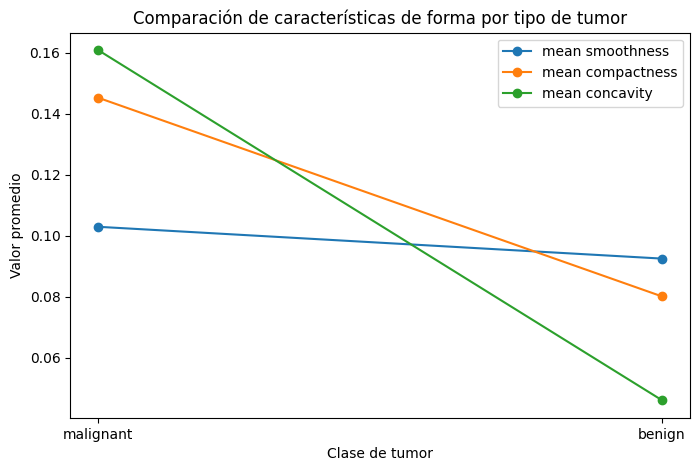

In [54]:
# Seleccionamos características de escala similar
cols = ['mean smoothness', 'mean compactness', 'mean concavity']
grouped_means = df.groupby('target')[cols].mean()
labels = breast_cancer.target_names

plt.figure(figsize=(8, 5))
for col in cols:
    plt.plot(labels, grouped_means[col], marker='o', label=col)

plt.title('Comparación de características de forma por tipo de tumor')
plt.ylabel('Valor promedio')
plt.xlabel('Clase de tumor')
plt.legend()
plt.show()

Podemos observar las mismas conclusiones que con los gráficos de puntos, y es que los tumores malignos suelen presentar valores medios de compacidad y concavidad mucho más altos que los benignos, mientras que en cuanto a la suavidad, solo es ligeramente superior en los malignos.

### Boxplots

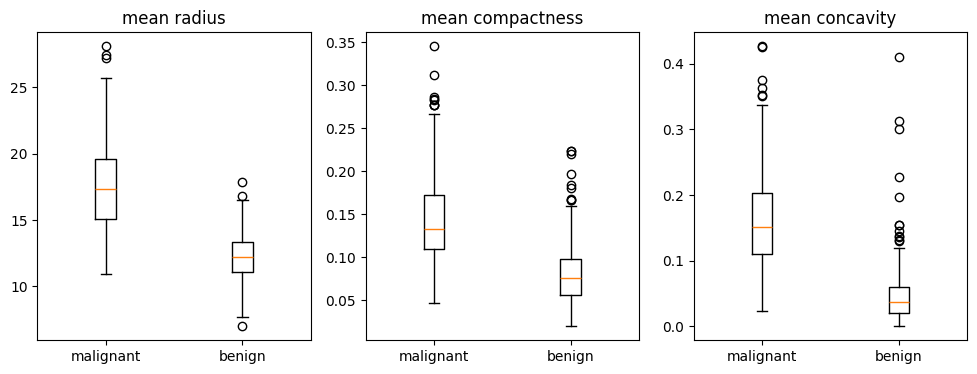

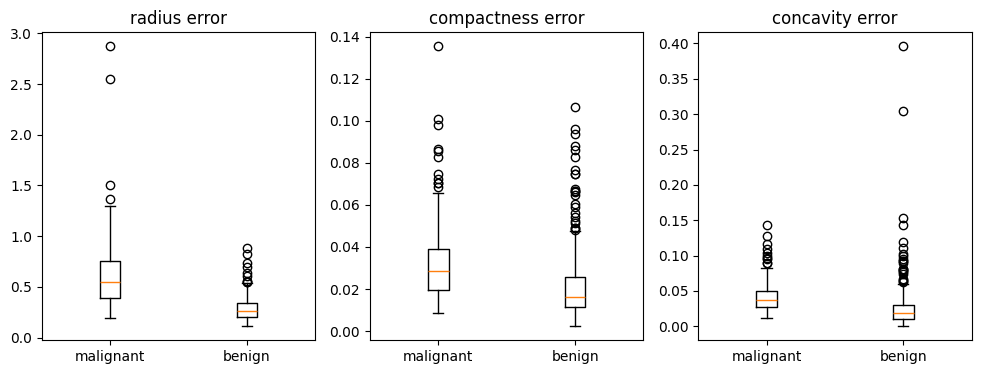

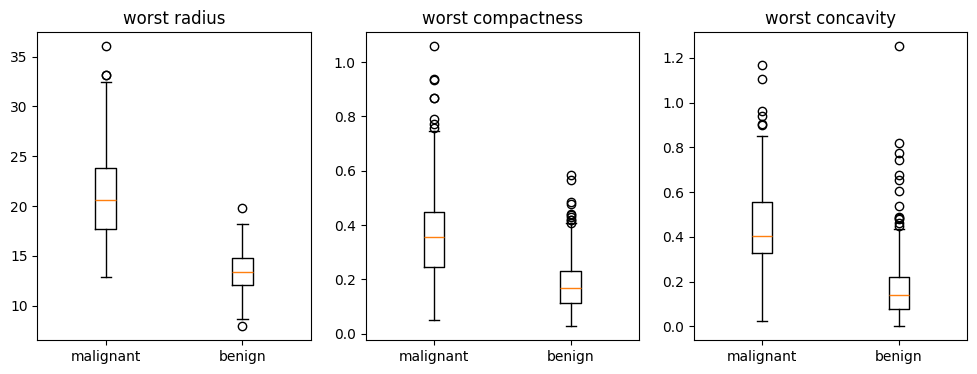

In [57]:
# Boxplots de diferentes atributos

d = [df[df["target"] == i] for i in range(2)]

# La siguiente función recibe listas de atributos de longitud = 3
# y grafica sus respectivos boxplots
def box_plots(attr, data = d):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, a in enumerate(attr):
        axs[i].set_title(a)
        axs[i].boxplot([data[0][a], data[1][a]], tick_labels=breast_cancer.target_names)

    plt.show()

attr = ["mean radius", "mean compactness", "mean concavity"] #"mean symmetry", "mean smoothness"]
box_plots(attr)

attr = ["radius error", "compactness error", "concavity error"]
box_plots(attr)

attr = ["worst radius", "worst compactness", "worst concavity"]
box_plots(attr)

Se observa que la **concavidad promedio** influye mucho en el diagnóstico. Mientras más bajo sea el valor más probable es que sea benigno

## Modelos con `scikit-learn`
### Árbol de decisión
Usando la función `DecisionTreeClassifier` podemos crear un **árbol de decisión binario**, que predice si un tumor es **maligno** o **benigno**. Este modelo lo entrenaremos mediante el método de *retención*. Con el fin de ver el rendimiento de nuestro modelo obtenemos su *matriz de confusión*.


Precisión del modelo: 0.9473684210526315

Matriz de confusión:
Accuracy: 0.9473684210526315, Recall: 0.9577464788732394, Precision: 0.9577464788732394 and F1: 0.9577464788732394


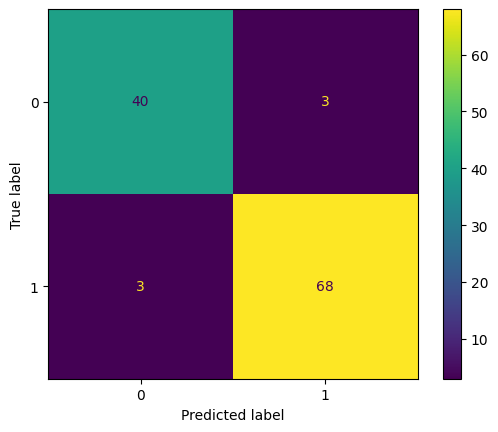

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = df.drop("target", axis=1)
y = df["target"]
random = 42

# Dividir conjunto de datos en entrenamiento y test para la validación (método de  en este casoretención)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

# Usar un modelo de aprendizaje supervisado y entrenarlo con nuestro conjunto de entrenamiento
model = DecisionTreeClassifier(random_state=random)
model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo mediante el predict y sacamos la matriz de confusión
y_pred = model.predict(X_test)
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")

# Obtenemos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# Sacamos los valores de la matriz de confusión
TP = np.sum((y_test ==  1) & (y_pred == 1))
TN = np.sum((y_test ==  0) & (y_pred == 0))
FP = np.sum((y_test ==  0) & (y_pred == 1))
FN = np.sum((y_test ==  1) & (y_pred == 0))

# Calculamos las métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision} and F1: {f1}")

### Perceptrón multicapa
Creamos ahora un **perceptrón multicapa** mediante `MLPClassifier`. Para su entrenamiento usaremos **K-Fold Cross Validation**, que es más apropiado. Para ello necesitaremos las métricas anteriormente vistas (para hacer la media posteriormente). Utilizaremos *5 folds* y 50 neuronas por capa.

In [ ]:
from sklearn.model_selection import KFold

model = MLPClassifier(hidden_layer_sizes=(50,50), random_state=random)
    
kf = KFold(n_splits = 5, shuffle = True, random_state = random)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
    
data_np = df.to_numpy()
labels_np = pd.Series(breast_cancer.target).to_numpy()

for i, (train_index, test_index) in enumerate(kf.split(df)):
    print(f"Fold {i}")
    # Dividimos en conjunto de entrenamiento y conjunto de testeo
    train_data = data_np[train_index]
    test_data = data_np[test_index]
    train_labels = labels_np[train_index]
    test_labels = labels_np[test_index]

    # Ajustamos el modelo
    model.fit(train_data, train_labels) # Here there is a point followed by an ellipsis (...).

    # Predecimos
    test_prediction = model.predict(test_data)
    test_prediction = np.array(test_prediction)
    test_labels = np.array(test_labels)

    # Sacamos los valores de la matriz de confusión
    TP = np.sum((test_labels ==  1) & (test_prediction == 1))
    TN = np.sum((test_labels ==  0) & (test_prediction == 0))
    FP = np.sum((test_labels ==  0) & (test_prediction == 1))
    FN = np.sum((test_labels ==  1) & (test_prediction == 0))

    # Calculamos las métricas
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Incluimos cada métrica en su correspondiente lista
    acc_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)

    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision} and F1: {f1}")

# Calculamos las medias
average_accuracy = np.mean(acc_list)
average_recall = np.mean(recall_list)
average_precision = np.mean(precision_list)
average_f1 = np.mean(f1_list)

print(f"Con el modelo validado por K-Fold Cross Validation (K=5) obtenemos Accuracy={average_accuracy}, Recall={average_recall}, Precision={average_precision} y F1={average_f1}")

Fold 0


c:\Users\usuario\OneDrive\Desktop\AprendizajeAutomatico\practicas-aprendizaje\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9122807017543859, Recall: 1.0, Precision: 0.8765432098765432 and F1: 0.9342105263157895
Fold 1
Accuracy: 0.8947368421052632, Recall: 0.8441558441558441, Precision: 1.0 and F1: 0.9154929577464789
Fold 2


c:\Users\usuario\OneDrive\Desktop\AprendizajeAutomatico\practicas-aprendizaje\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8859649122807017, Recall: 0.9014084507042254, Precision: 0.9142857142857143 and F1: 0.9078014184397163
Fold 3
Accuracy: 0.9122807017543859, Recall: 0.9154929577464789, Precision: 0.9420289855072463 and F1: 0.9285714285714286
Fold 4
Accuracy: 0.8849557522123894, Recall: 0.9850746268656716, Precision: 0.8461538461538461 and F1: 0.9103448275862068
Con el modelo validado por K-Cross Validation (K=5) obtenemos Accuracy=0.8980437820214252, Recall=0.929226375894444, Precision=0.9158023511646698 y F1=0.919284231731924
